In [1]:
# Q3: Do the attributes of a song play a role in the amount of streams across platforms? (Chase).

In [2]:
# Looking to see if there is a correlation between the danceability, energy, loudness, speechiness, acousticness, and instrumentalness
# liveness, and valence contribute to a difference in streams across YouTube and Spotify.

# Visualization - Heatmap



In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Loading and Cleaning
filepath = '../data/Spotify_Youtube.csv'
data = pd.read_csv(filepath)
data = data.drop(columns=['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Description'])
data.info()
custom_palette = sns.color_palette(["#BC4749", "#F2E8CF", "#A7C957", "#6A994E", "#386641"]) #adjusting for heatmap. Order maps bottom up on heatmap


sns.set_palette(custom_palette)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Title             20248 non-null  object 
 16  Channel           20248 non-null  object

In [71]:
# drop null values
df = data.dropna(how="any")

# drop 2, 3, 6, 13, 14, 16 18, 19, 20, and 21.
df2_test = df.drop(columns=["Album", "Album_type", "Key", "Tempo", "Duration_ms", "Channel", "Likes", "Comments", "Licensed", "official_video", "Title"])

# drop any characters that are non-english for the artist name for cleanliness
df2 = df2_test[df2_test['Artist'].str.contains(r'^[a-zA-Z\s]+$', na=False)]

# convert Views and streams to non-scientific notation values
df2.loc[:, ['Views', 'Stream']] = df2[['Views', 'Stream']].apply(lambda x: x.apply(lambda y: '{:.2f}'.format(y)))
df2.head()

C:\Users\Chase\AppData\Local\Temp\ipykernel_8868\3892014591.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['693555221.00' '72011645.00' '8435055.00' ... '35646.00' '6533.00'
 '158697.00']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[:, ['Views', 'Stream']] = df2[['Views', 'Stream']].apply(lambda x: x.apply(lambda y: '{:.2f}'.format(y)))
C:\Users\Chase\AppData\Local\Temp\ipykernel_8868\3892014591.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1040234854.00' '310083733.00' '63063467.00' ... '6226110.00'
 '6873961.00' '5695584.00']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[:, ['Views', 'Stream']] = df2[['Views', 'Stream']].apply(lambda x: x.apply(lambda y: '{:.2f}'.format(y)))


,Artist,Track,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Views,Stream
0,Gorillaz,Feel Good Inc.,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,693555221.00,1040234854.00
1,Gorillaz,Rhinestone Eyes,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,72011645.00,310083733.00
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,8435055.00,63063467.00
3,Gorillaz,On Melancholy Hill,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,211754952.00,434663559.00
4,Gorillaz,Clint Eastwood,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,618480958.00,617259738.00


In [72]:
# create spotify and youtube dataframes

# SPOTIFY
# drop 10
spotify_df = df2.drop(columns=["Views"])
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16802 entries, 0 to 20717
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            16802 non-null  object 
 1   Track             16802 non-null  object 
 2   Danceability      16802 non-null  float64
 3   Energy            16802 non-null  float64
 4   Loudness          16802 non-null  float64
 5   Speechiness       16802 non-null  float64
 6   Acousticness      16802 non-null  float64
 7   Instrumentalness  16802 non-null  float64
 8   Liveness          16802 non-null  float64
 9   Valence           16802 non-null  float64
 10  Stream            16802 non-null  object 
dtypes: float64(8), object(3)
memory usage: 1.5+ MB


In [73]:
# YOUTUBE
# drop 11
youtube_df = df2.drop(columns=["Stream"])
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16802 entries, 0 to 20717
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            16802 non-null  object 
 1   Track             16802 non-null  object 
 2   Danceability      16802 non-null  float64
 3   Energy            16802 non-null  float64
 4   Loudness          16802 non-null  float64
 5   Speechiness       16802 non-null  float64
 6   Acousticness      16802 non-null  float64
 7   Instrumentalness  16802 non-null  float64
 8   Liveness          16802 non-null  float64
 9   Valence           16802 non-null  float64
 10  Views             16802 non-null  object 
dtypes: float64(8), object(3)
memory usage: 1.5+ MB


In [74]:
# Test some stuff out and clean data

In [75]:
#1. Streams and Views: Why Analyze Them Together?
#Complementary Measures of Popularity:
#Streams represent audio-only consumption, while Views incorporate a visual component. By analyzing them together, you can understand whether a song’s attributes influence its popularity across different platform types.
#Example: A song might do well in Streams because it’s great for playlists, but it might not perform as well in Views if it lacks a compelling visual element.
#Platform-Specific Insights:
#Streams and Views allow us to compare trends across audio-centric platforms (Spotify, Apple Music) and video-centric platforms (YouTube). By studying both, you can identify if certain song attributes (e.g., Danceability or Energy) universally drive popularity or are platform-specific.
#Example: A high-energy dance track might excel in both Streams and Views if it inspires dance trends but might show stronger effects on Views due to its shareability in videos.



In [77]:
# Start SVV org for data viz
# First, I want to group the artists by views and artists by streams to see the different artist counts -- create a bar chart for VIZ and reference.

# CHATGPT Bar Chart response for:
# Use a grouped or stacked bar chart to compare the Views and Stream for a subset of artists. If there are too many artists, filter to display the top N artists by Views or Stream.

# Second, I 

In [102]:
# create svv_org_1 df to aggregate the artists in str

svv_org_1 = df2.groupby('Artist').agg({
    'Views': 'sum',
    'Stream': 'sum'
}).reset_index()

# Ensure 'Views' and 'Stream' columns are numeric
svv_org_1['Views'] = pd.to_numeric(df2['Views'], errors='coerce')
svv_org_1['Stream'] = pd.to_numeric(df2['Stream'], errors='coerce')

# Now perform the groupby and aggregation
svv_org_1 = df2.groupby('Artist').agg({
    'Views': 'sum',
    'Stream': 'sum'
}).reset_index()

# Set display option to show floats in non-scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

svv_org_1

,Artist,Views,Stream
0,A Boogie Wit da Hoodie,436323847.00,3328674589.00
1,A Day To Remember,250881937.00,1024190620.00
2,A Tribe Called Quest,143591509.00,740669596.00
3,ABBA,1969452551.00,3347361606.00
4,AJR,336763173.00,1645948980.00
...,...,...,...
1738,keshi,108064793.00,838416268.00
1739,kevoxx,42465717.00,86947091.00
1740,sped up nightcore,7618744.00,161780668.00
1741,surrenderdorothy,1755840.00,56430938.00


In [133]:
#Get random sample of 100 artists
random_sample = svv_org_1.sample(n=100, random_state=1)

#Sort DF by views; drop streams
random_views = random_sample.drop(columns=['Stream']).sort_values(by='Views', ascending=False)
print(random_views)

#Sort DF by streams; drop views
random_streams = random_sample.drop(columns=['Views']).sort_values(by='Stream', ascending=False)
print(random_streams)



                      Artist         Views
1143             Nicki Minaj 8017064073.00
1256             Post Malone 6394420209.00
1004             Mambo Kingz 5097751701.00
1221            Paulo Londra 4986053204.00
1513          Tanishk Bagchi 4015494668.00
...                      ...           ...
599               Haftbefehl   20062233.00
1646               Vacations   15757181.00
418                  Dybbukk   14773181.00
133            Bear McCreary   13505166.00
1678  White Noise Baby Sleep    2195277.00

[100 rows x 2 columns]
                   Artist         Stream
1256          Post Malone 15251263853.00
1143          Nicki Minaj  6456929603.00
1625         Travis Scott  6373169661.00
1157              Nirvana  4769126288.00
1517         Taylor Swift  4457122345.00
...                   ...            ...
1390  Sergei Rachmaninoff   130452614.00
133         Bear McCreary   128438247.00
1364            Saindhavi   116363823.00
589         Gurlez Akhtar    69654299.00
1410     

In [139]:
random_views.describe()

,Views
count,100.00
mean,921532653.98
std,1383849434.61
min,2195277.00
25%,138395930.25
50%,411814269.00
75%,1087640948.00
max,8017064073.00


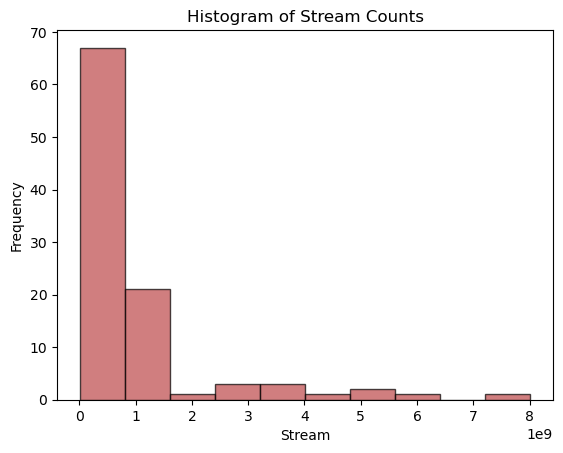

In [138]:
random_views['Views'].plot(kind='hist', bins=10, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Stream Counts')
plt.xlabel('Stream')
plt.ylabel('Frequency')

# Display the plot
plt.show()

                       Artist         Views        Stream
1329             Rochak Kohli 1295208949.00  485110961.00
959          Ludovico Einaudi   93977045.00  987816020.00
1271  Queens of the Stone Age  484866449.00 1031366596.00
723     Johann Sebastian Bach   39538521.00  488958789.00
942               Los Panchos   63278205.00  166159996.00
...                       ...           ...           ...
771                KAYTRANADA   62911882.00  620201257.00
1695                   Xzibit  130753725.00  288285974.00
1588            Thomas Newman   24365118.00  294433339.00
434            Eladio Carrion  451701931.00 1032825963.00
231              Camilo Sesto  316200493.00  426723898.00

[100 rows x 3 columns]


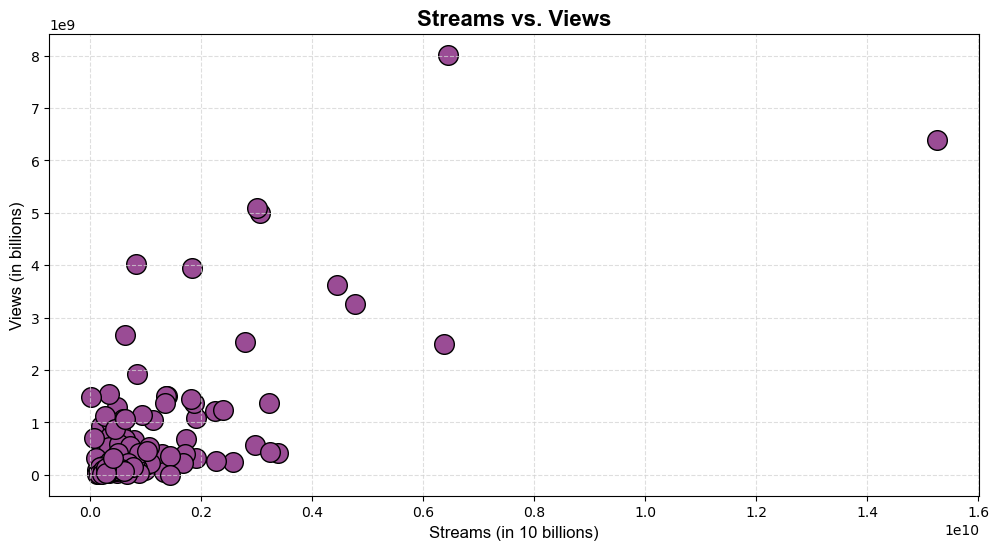

In [109]:
#Get random sample of 100 artists
random_sample = svv_org_1.sample(n=100, random_state=1)
random_sample(by='column_name', ascending=False)
print(random_sample)

# Scatter Plot # Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(random_sample.Stream, random_sample.Views, color="#9A4C95", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Streams (in 10 billions)", fontfamily="Arial", fontsize=12)
plt.ylabel("Views (in billions)", fontfamily="Arial", fontsize=12)
plt.title("Streams vs. Views", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(150, 650)
# plt.xlim(11, 26)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

                       Artist         Views        Stream
1329             Rochak Kohli 1295208949.00  485110961.00
959          Ludovico Einaudi   93977045.00  987816020.00
1271  Queens of the Stone Age  484866449.00 1031366596.00
723     Johann Sebastian Bach   39538521.00  488958789.00
942               Los Panchos   63278205.00  166159996.00


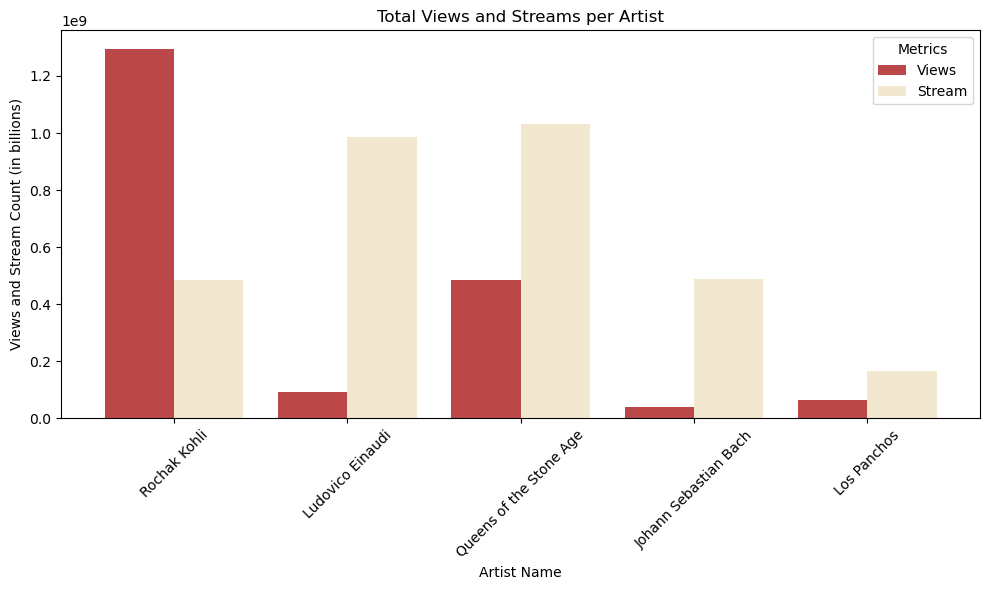

In [104]:
# Get a random sample of 5 artists from the svv_org_1 DataFrame
random_sample_artists = svv_org_1.sample(n=5, random_state=1)

# Display the random sample
print(random_sample_artists)

# Get a random sample of 5 artists from the svv_org_1 DataFrame
random_sample_artists = svv_org_1.sample(n=5, random_state=1)  # random_state for reproducibility

# Set the index to 'Artist' for plotting
random_sample_artists.set_index('Artist', inplace=True)

# Plotting
ax = random_sample_artists.plot(kind='bar', figsize=(10, 6), width=0.8)

# Set display format for the y-axis to non-scientific notation
for label in ax.get_yticklabels():
    label.set_text('{:.2f}'.format(float(label.get_text())))

plt.title('Total Views and Streams per Artist')
plt.xlabel("Artist Name")
plt.ylabel("Views and Stream Count (in billions)")
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [ ]:
q1_data set

In [ ]:
#2. Core Engagement Attributes: Why Group Danceability, Energy, Loudness, Valence, and Speechiness?
#Focus on Listener and Viewer Engagement:
#These attributes are directly tied to how engaging or emotionally resonant a track is with its audience. They determine how the song makes people feel (Valence), whether they want to dance to it (Danceability), or how intense it feels (Energy).
#Behavioral Connection:
#These attributes likely affect how often people return to the track or share it. For instance, highly danceable or energetic tracks may correlate with increased Streams and Views because they’re fun, replayable, and usable in social media content.
#Cross-Platform Appeal:
#By grouping them, we can test if engagement attributes universally influence Streams and Views or if specific attributes are more impactful on one platform. For example:
#Danceability might have a strong impact on Streams (e.g., workout playlists) but an even greater impact on Views if paired with a dance trend (e.g., TikTok).
#Valence might influence Streams (listeners seeking happy or sad music) and Views (people connecting with the visual storytelling in videos).

In [ ]:
#3. Production-Related Attributes: Why Group Acousticness, Instrumentalness, and Liveness?
#Reflect Song Style and Genre Preferences:
#These attributes focus on the nature of the song’s production, capturing details like whether it’s acoustic, vocal-free, or has a live performance feel. Grouping them helps us understand how stylistic and genre preferences impact Streams and Views.
#Audience-Specific Insights:
# Acoustic tracks (high Acousticness) or instrumental tracks (high Instrumentalness) may appeal to niche audiences (e.g., study music or classical fans). Grouping these attributes allows us to assess whether their niche appeal leads to consistent performance across Streams and Views or diverges between platforms.
#Example: Acoustic or instrumental tracks may perform better in Streams because listeners use them as background music but might have fewer Views if there’s no visually engaging element.
#Live Appeal:
#Liveness, reflecting a track's live-performance feel, might resonate with viewers on video platforms where live music videos or concert recordings thrive. By grouping it with other production-focused attributes, we can examine how different production styles influence popularity across platforms.


In [ ]:
############################################################################################################################################################

In [ ]:
#DATA VIZ

In [13]:
# Rewrite COORS df for table -- DO NOT RUN ANYTHING BELOW UNTIL THAT IS DONE OR YOU WILL LOSE THINGS!


<class 'pandas.core.frame.DataFrame'>
Index: 19549 entries, 0 to 20717
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Danceability      19549 non-null  float64
 1   Energy            19549 non-null  float64
 2   Loudness          19549 non-null  float64
 3   Speechiness       19549 non-null  float64
 4   Acousticness      19549 non-null  float64
 5   Instrumentalness  19549 non-null  float64
 6   Liveness          19549 non-null  float64
 7   Valence           19549 non-null  float64
 8   Views             19549 non-null  float64
 9   Stream            19549 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Views,Stream
Danceability,1.000000,0.237951,0.357645,0.226462,-0.281316,-0.321491,-0.083383,0.463227,0.088328,0.071932
Energy,0.237951,1.000000,0.745337,0.088822,-0.662166,-0.316807,0.174285,0.391684,0.067167,0.044684
Loudness,0.357645,0.745337,1.000000,0.068065,-0.552778,-0.556156,0.086988,0.315977,0.118268,0.118927
Speechiness,0.226462,0.088822,0.068065,1.000000,-0.098167,-0.112538,0.066033,0.060491,-0.009980,-0.016246
Acousticness,-0.281316,-0.662166,-0.552778,-0.098167,1.000000,0.282588,-0.052555,-0.205609,-0.070425,-0.104101
Instrumentalness,-0.321491,-0.316807,-0.556156,-0.112538,0.282588,1.000000,-0.057159,-0.270269,-0.079723,-0.091927
Liveness,-0.083383,0.174285,0.086988,0.066033,-0.052555,-0.057159,1.000000,0.031820,-0.016488,-0.037395
Valence,0.463227,0.391684,0.315977,0.060491,-0.205609,-0.270269,0.031820,1.000000,0.037291,-0.012869
Views,0.088328,0.067167,0.118268,-0.009980,-0.070425,-0.079723,-0.016488,0.037291,1.000000,0.602563
Stream,0.071932,0.044684,0.118927,-0.016246,-0.104101,-0.091927,-0.037395,-0.012869,0.602563,1.000000


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19549 entries, 0 to 20717
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19549 non-null  object 
 1   Track             19549 non-null  object 
 2   Danceability      19549 non-null  float64
 3   Energy            19549 non-null  float64
 4   Loudness          19549 non-null  float64
 5   Speechiness       19549 non-null  float64
 6   Acousticness      19549 non-null  float64
 7   Instrumentalness  19549 non-null  float64
 8   Liveness          19549 non-null  float64
 9   Valence           19549 non-null  float64
 10  Title             19549 non-null  object 
 11  Views             19549 non-null  float64
 12  Stream            19549 non-null  float64
dtypes: float64(10), object(3)
memory usage: 2.1+ MB


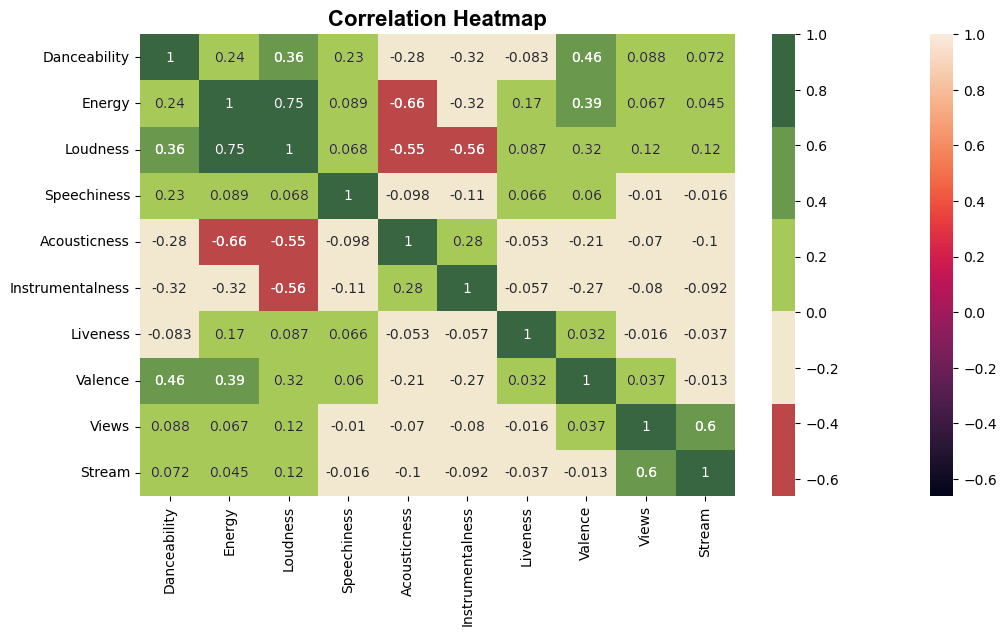

In [12]:
# Heatmap for Days
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.heatmap(corrs, annot=True)

# Define a custom palette
custom_palette = sns.color_palette(as_cmap=True)

# Create a heatmap with the custom color palette
sns.heatmap(corrs, annot=True, cmap=custom_palette)

# Customization for title only (no cmap here)
plt.title("Correlation Heatmap", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show/Save the Graph
plt.show()

In [36]:
# Sample DataFrame
data = {'text_column': ['Hello', '你好', 'Goodbye', 'Adiós', 'Welcome']}
df111 = pd.DataFrame(data)

# Remove non-English objects
df_filtered = df111[df111['text_column'].str.contains(r'^[a-zA-Z\s]+$', na=False)]
df_filtered

,text_column
0,Hello
2,Goodbye
4,Welcome
